In [1]:
import pandas as pd
import os

DATA_PATH = './in/'
HOUSING_PATH = 'housing.csv'

def fetch_housing_data(file=HOUSING_PATH, path=DATA_PATH):
    csv_path = os.path.join(path, file)
    return pd.read_csv(csv_path)

In [2]:
housing = fetch_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

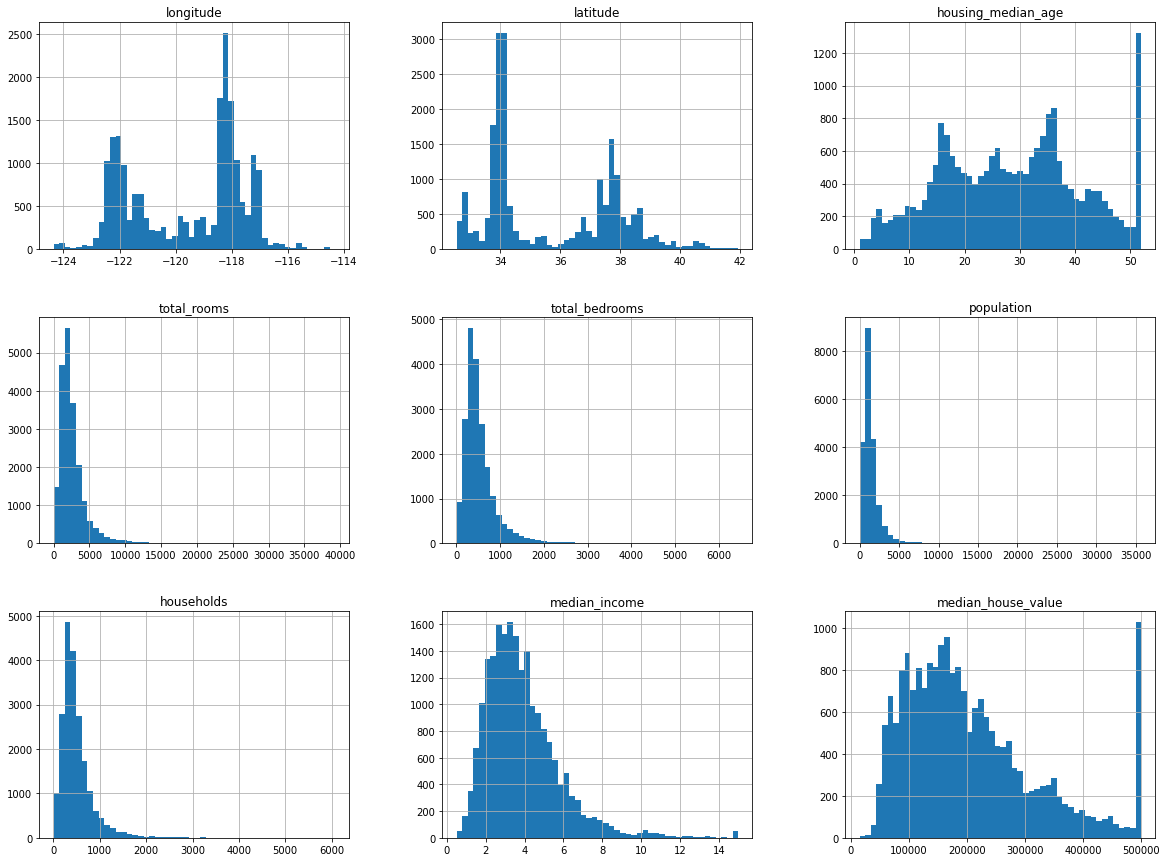

In [6]:
housing.hist(bins=50, figsize=(20,15))

In [7]:
import numpy as np

def split_train_test(data, ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
import hashlib

def test_set_check(identifier, test_ratio, hash_method):
    return hash_method(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash_method=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash_method))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing['id'] = housing['longitude'] * 1000 + housing['latitude']

In [9]:
from sklearn.model_selection import train_test_split

<AxesSubplot:>

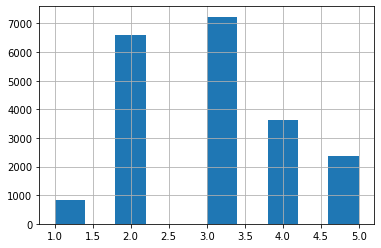

In [10]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

housing['income_cat'].hist()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    stat_train_set = housing.loc[train_index]
    stat_test_set = housing.loc[test_index]

housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [12]:
test_set['income_cat'].value_counts() / len(test_set)

3.0    0.358527
2.0    0.324370
4.0    0.167393
5.0    0.109496
1.0    0.040213
Name: income_cat, dtype: float64

In [13]:
stat_train_set['income_cat'].value_counts() / len(stat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [14]:
for set_ in (stat_test_set, stat_train_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [15]:
#---------------Data analysis------------------
housing = stat_train_set.copy()

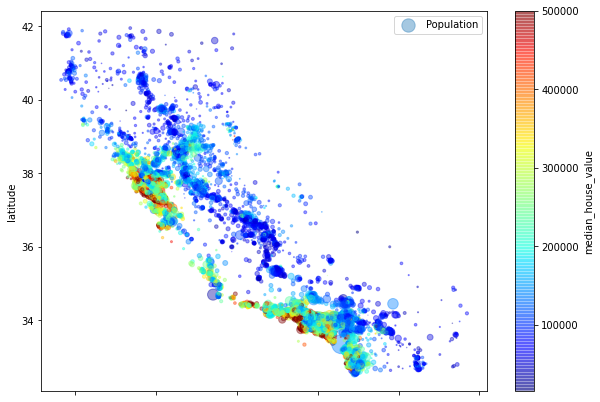

In [16]:
import matplotlib.pyplot  as plt

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing['population']/100, label='Population', figsize=(10,7),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [17]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
id                   -0.047632
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='population', ylabel='longitude'>,
        <AxesSubplot:xlabel='households', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='longitude'>,
        <AxesSubplot:xlabel='id', ylabel='longitude'>],
       [<AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='populat

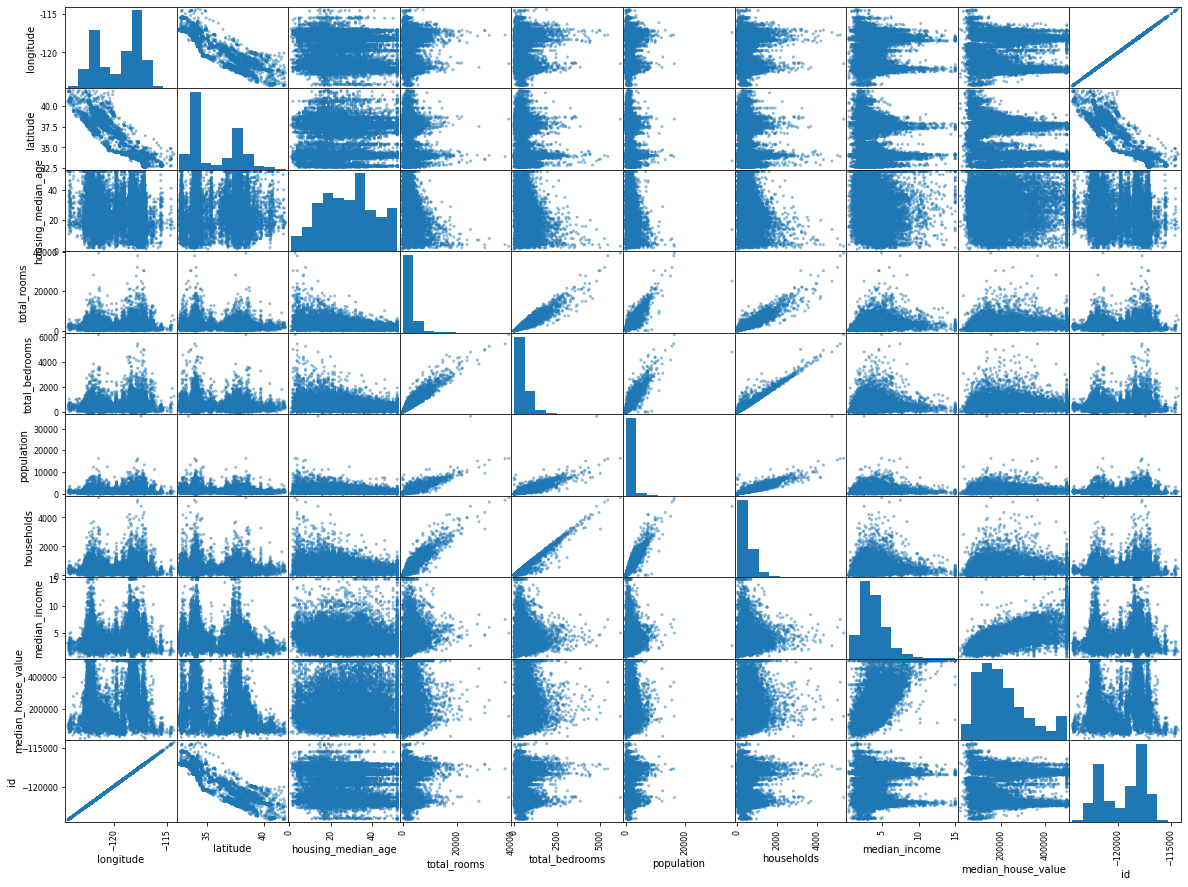

In [18]:
from pandas.plotting import scatter_matrix

scatter_matrix(housing, figsize=(20, 15))

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

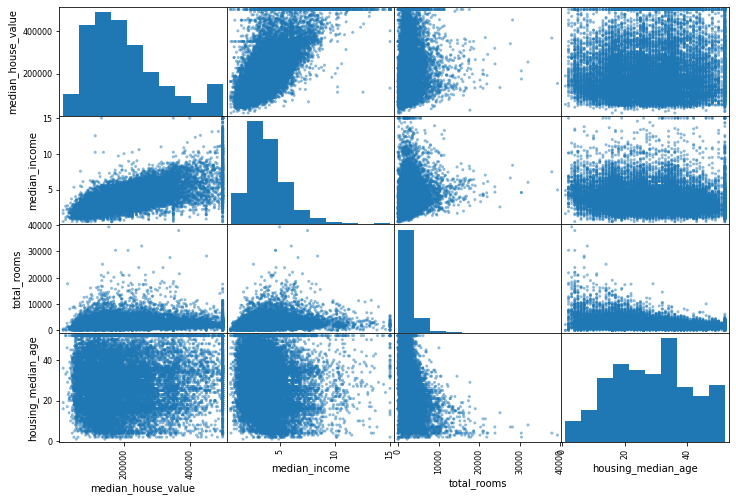

In [19]:
attributes = ['median_house_value', 'median_income', 'total_rooms',
              'housing_median_age']

scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

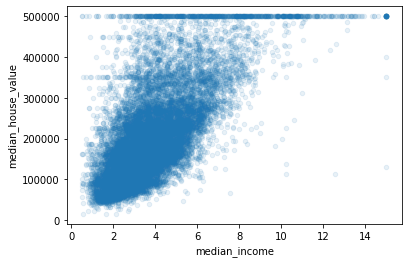

In [20]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)



In [21]:
housing['rooms_per_family'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_rooms'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_family'] = housing['population'] / housing['households']

In [22]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value       1.000000
median_income            0.687160
rooms_per_family         0.146285
total_rooms              0.135097
housing_median_age       0.114110
households               0.064506
total_bedrooms           0.047689
population_per_family   -0.021985
population              -0.026920
longitude               -0.047432
id                      -0.047632
latitude                -0.142724
bedrooms_per_rooms      -0.259984
Name: median_house_value, dtype: float64

In [23]:
housing = stat_train_set.drop('median_house_value', axis=1).drop('id', axis=1)
housing_label = stat_train_set['median_house_value'].copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [25]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [26]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [27]:
from sklearn.preprocessing import LabelEncoder
'''The problem with this coding method is
that machine learning algorithms will treat
values closer to each other as more correlated
(e.g. 1 and 0 will be more correlated than 0
and 4, but it is not'''
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [28]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [29]:
#tha same result using other, shorter method
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer(sparse_output=True) #when sparse_output is True, matrix is sparse
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedroom_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_family = X[:, rooms_ix] / X[:, household_ix]
        population_per_family = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_rooms = X[:, bedroom_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_family, population_per_family, bedrooms_per_rooms]
        return np.c_[X, rooms_per_family, population_per_family]

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names].values


class LabelBinarizerPipelineFriendly(LabelBinarizer):
     def fit(self, X, y=None):
         super(LabelBinarizerPipelineFriendly, self).fit(X)
     def transform(self, X, y=None):
         return super(LabelBinarizerPipelineFriendly, self).transform(X)

     def fit_transform(self, X, y=None):
         return super(LabelBinarizerPipelineFriendly, self).fit(X).transform(X)


In [32]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', LabelBinarizerPipelineFriendly())
])


In [33]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

LinearRegression()

In [35]:
some_data = housing.iloc[:5]
some_labels = housing_label[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Forecasts: ', lin_reg.predict(some_data_prepared))
print('Labels: ', list(some_labels))

Forecasts:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [36]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor()

In [38]:
housing_predictions = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_label, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [40]:
def display_scores(scores):
    print('result: ', scores)
    print('mean: ', scores.mean())
    print('standard deviation:', scores.std())

display_scores(tree_rmse_scores)

result:  [68103.3815078  65383.8024434  71615.00041015 68450.3869382
 71536.90916093 75584.3173995  70986.55413272 70549.58682468
 75688.37811547 70542.41762652]
mean:  70844.073455937
standard deviation: 3004.4176865162754


In [41]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_label, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

result:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
mean:  69052.46136345083
standard deviation: 2731.674001798344


In [42]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_label)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_label, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

result:  [49351.86708247 47861.61865797 49671.99506414 51853.71876593
 49848.94877074 53554.10064214 48911.27187634 47895.06052043
 53052.18056739 50116.58539525]
mean:  50211.73473427986
standard deviation: 1889.1331590283853


In [45]:
forest_housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_label, forest_housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18721.757668068418